<a href="https://colab.research.google.com/github/Vyshnavi2k5/Aiml/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/titanic.csv",sep=',', index_col=0)
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [3]:

df.describe()


Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:

l=list(df.columns)
l[0:len(l)-2]

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare']

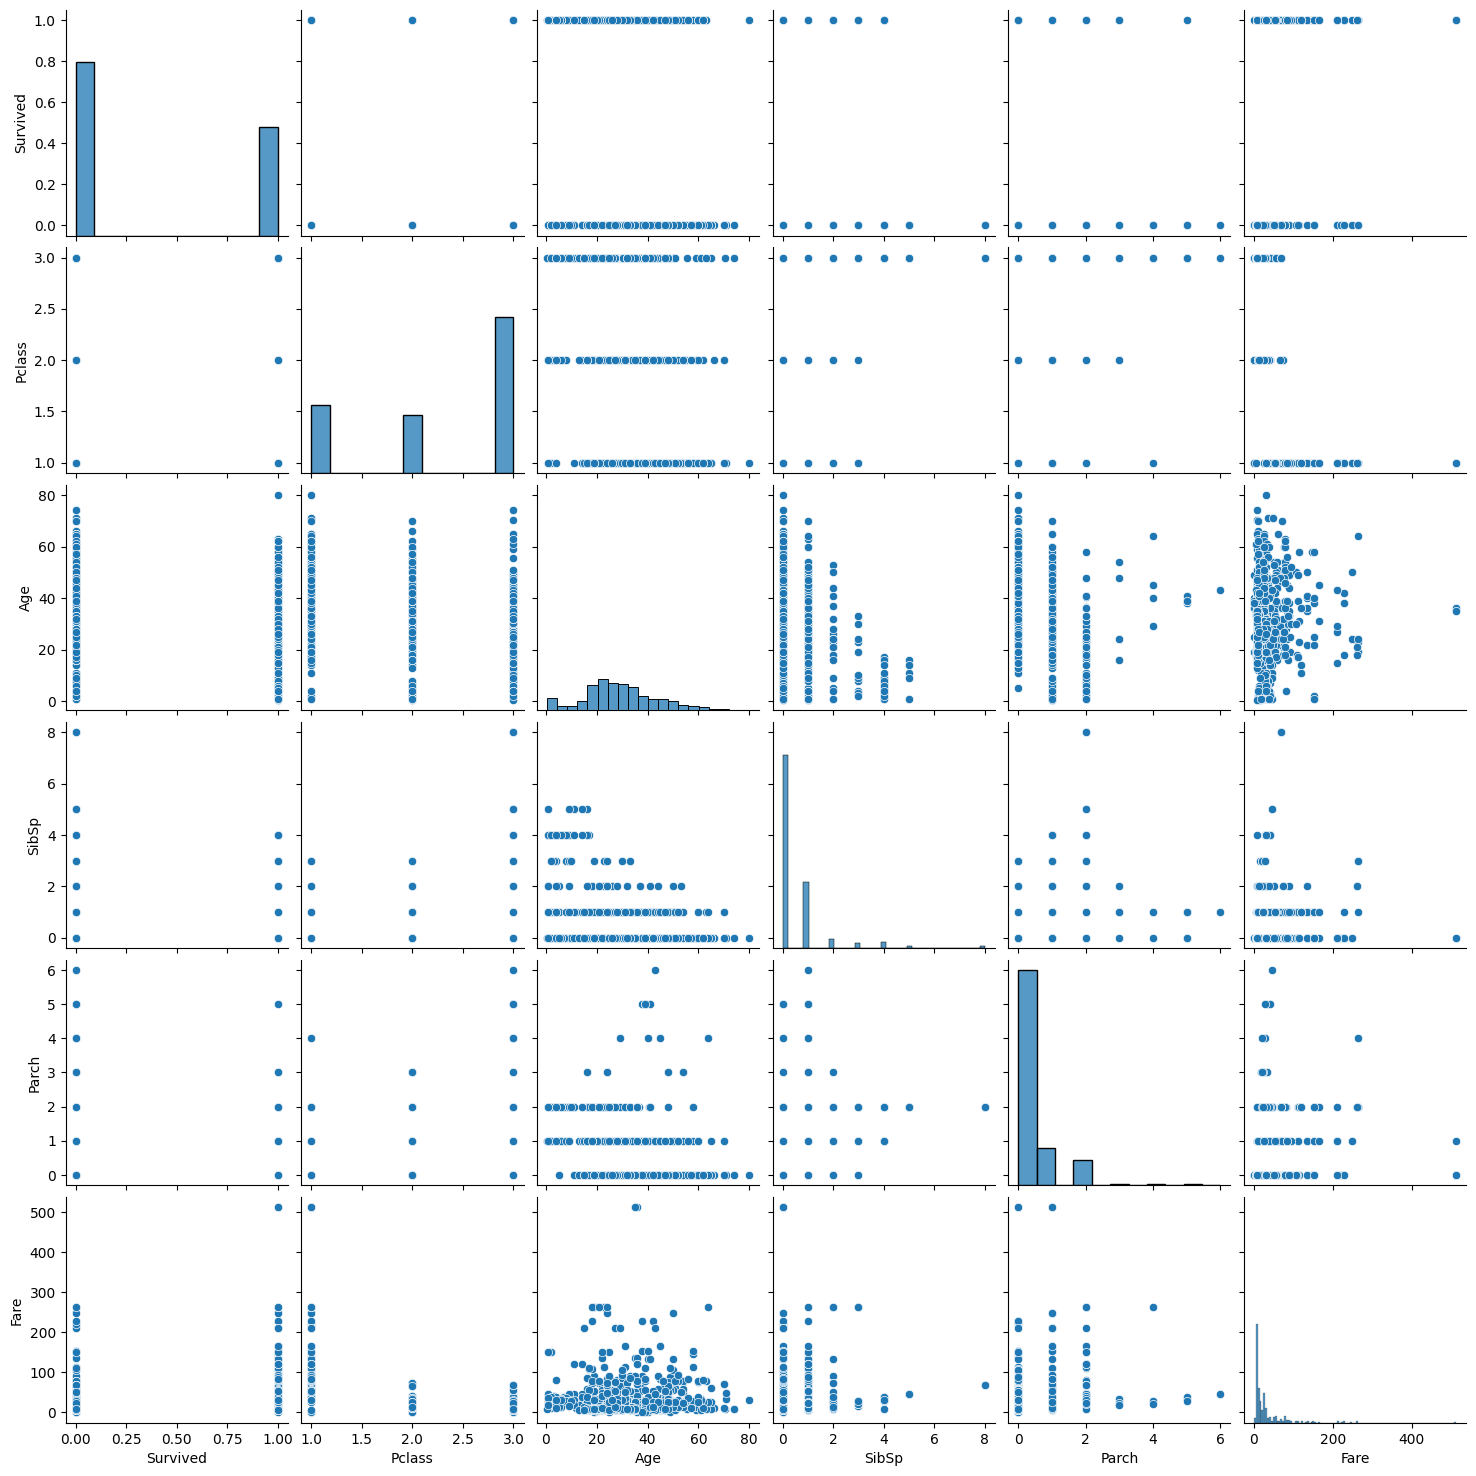

In [5]:
sns.pairplot(df)

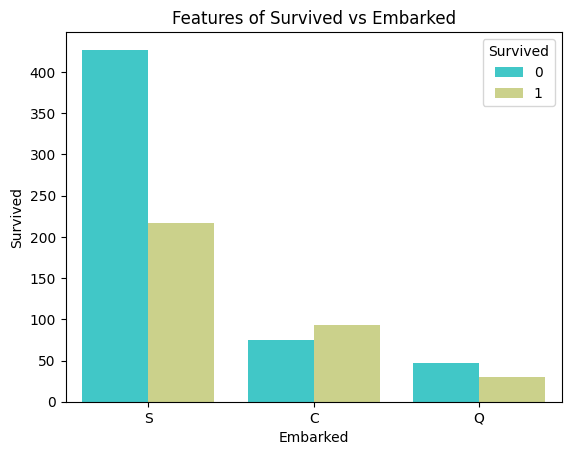

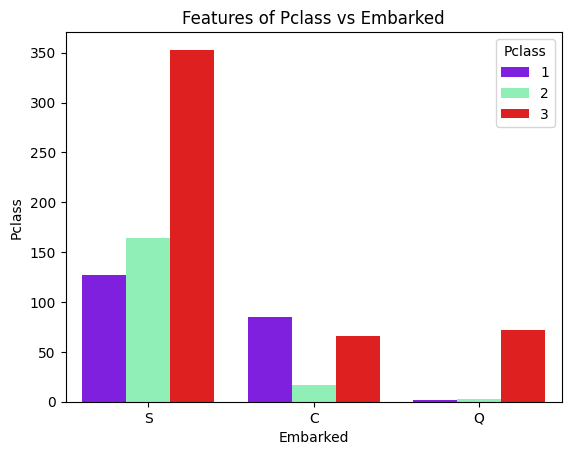

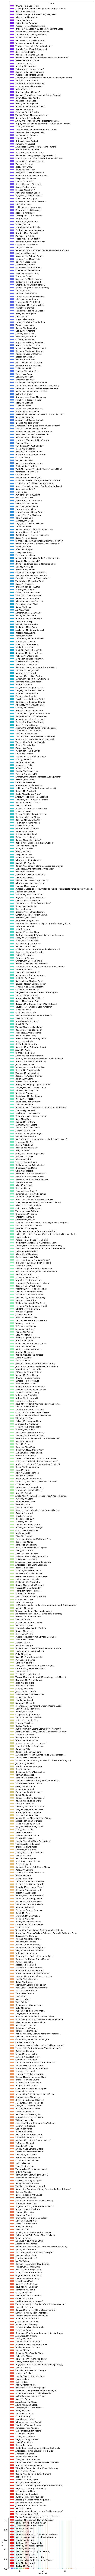

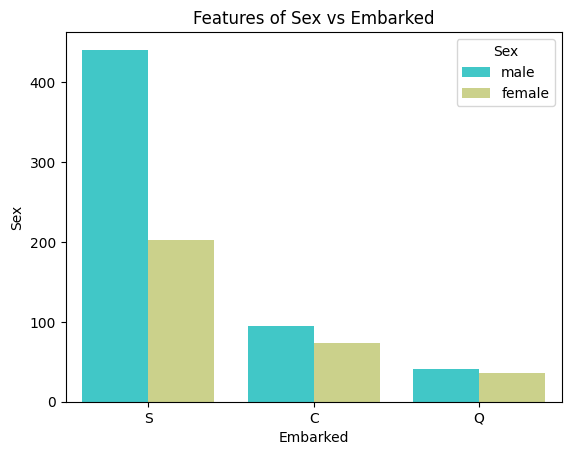

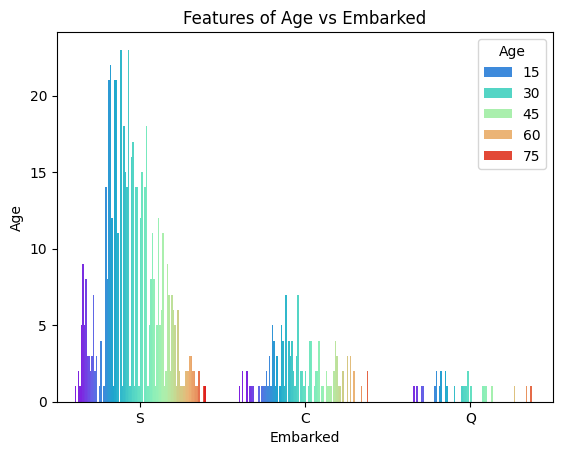

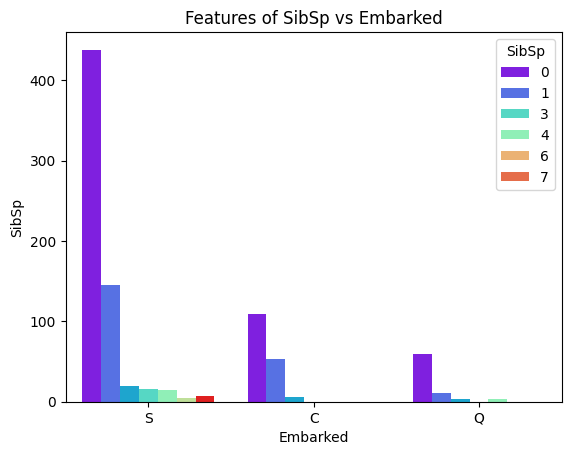

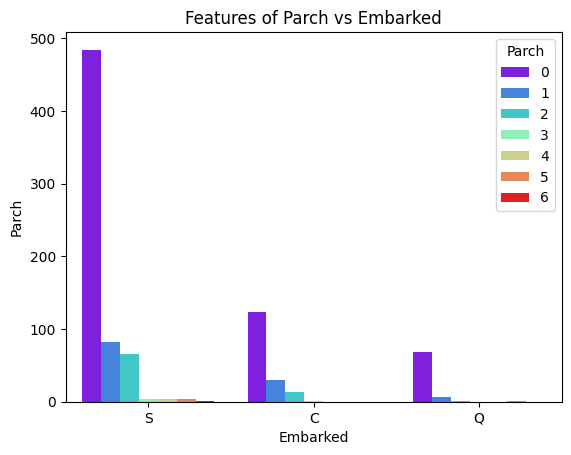

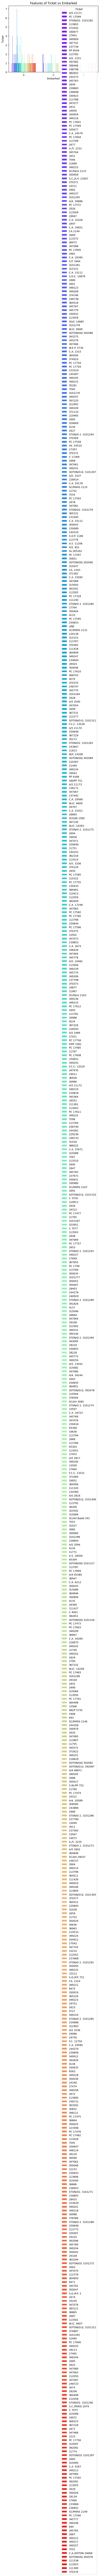

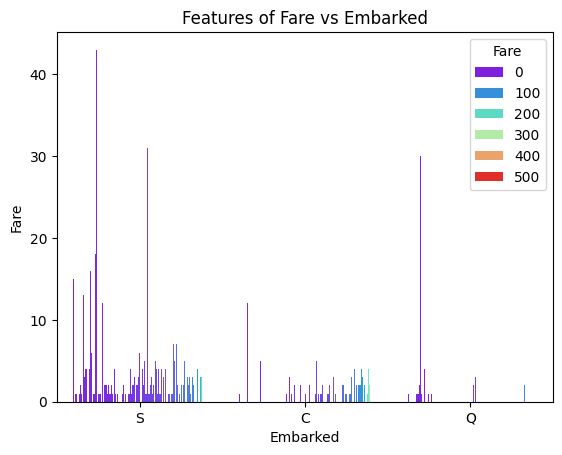

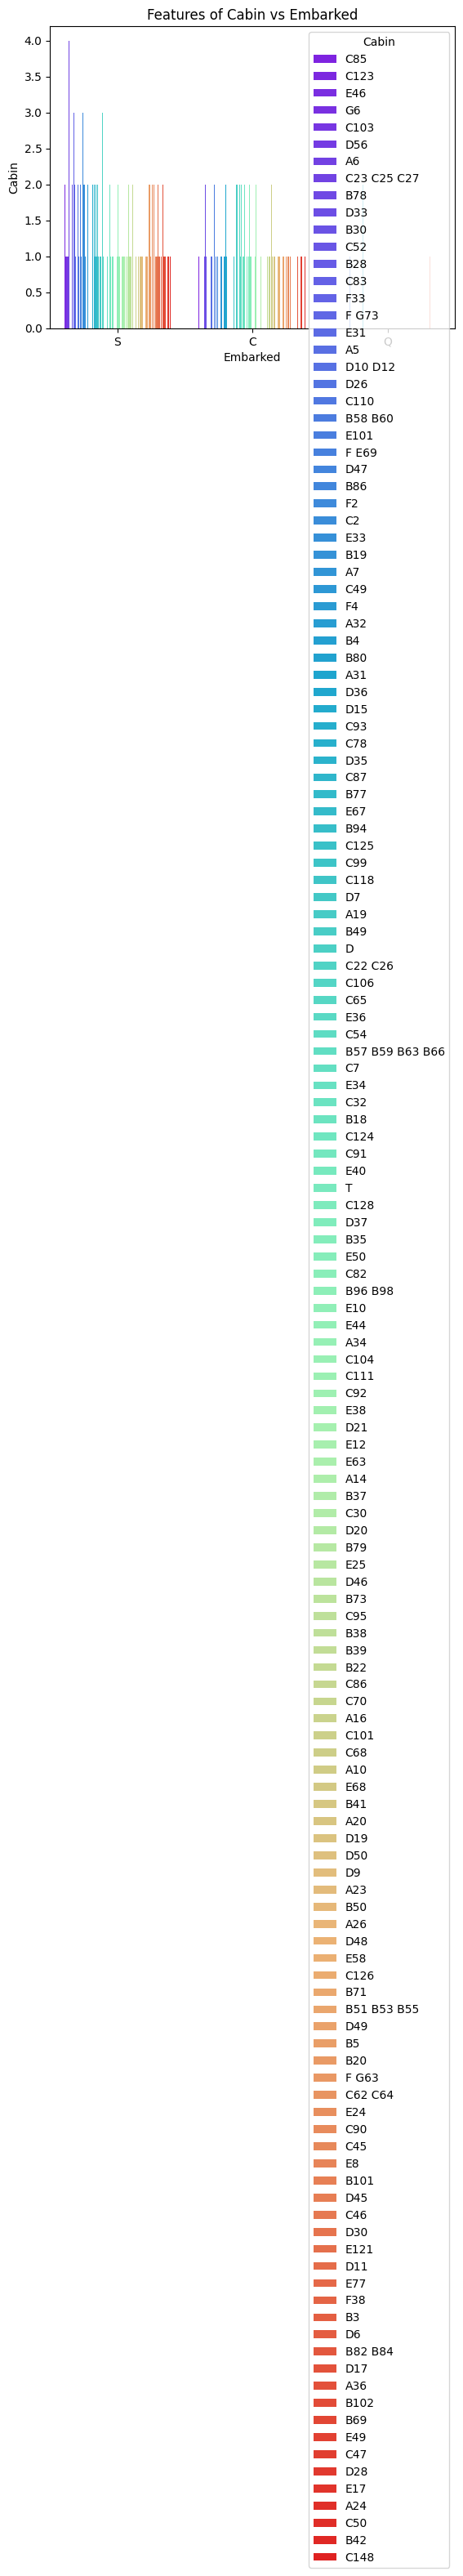

<Figure size 640x480 with 0 Axes>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

l = list(df.columns)
# Assuming 'TARGET CLASS' is the last column, adjust index if needed
x_col = df.columns[-1]  # Get the name of the last column
feature_cols = l[:-1]  # Exclude the last column (TARGET CLASS)

for col in feature_cols:
    sns.countplot(x=x_col, hue=col, data=df, palette='rainbow')  # Use x_col
    plt.title(f"Features of {col} vs {x_col}")  # Use x_col in title
    plt.xlabel(x_col)  # Use x_col for x-axis label
    plt.ylabel(col)
    plt.figure()

<Figure size 640x480 with 0 Axes>


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# 1. Identify columns with string (object) data type
object_cols = df.select_dtypes(include=['object']).columns

# 2. Drop or encode the string columns
# Option 1: Drop the string columns
df_numeric = df.drop(columns=object_cols)

# Option 2: Encode the string columns using one-hot encoding
# df_encoded = pd.get_dummies(df, columns=object_cols)

# 3. Proceed with scaling using the modified DataFrame (df_numeric or df_encoded)
scaler = StandardScaler()

# Replace 'Survived' with the actual target column name
actual_target_column_name = 'Survived'

# Select features (exclude the target column)
features = df_numeric.drop(columns=[actual_target_column_name])

# Fit the scaler on the features
scaler.fit(features)

# Transform the features
scaled_features = scaler.transform(features)

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=features.columns)
df_feat.head()

Pclass       Age     SibSp     Parch      Fare
0  0.827377 -0.530377  0.432793 -0.473674 -0.502445
1 -1.566107  0.571831  0.432793 -0.473674  0.786845
2  0.827377 -0.254825 -0.474545 -0.473674 -0.488854
3 -1.566107  0.365167  0.432793 -0.473674  0.420730
4  0.827377  0.365167 -0.474545 -0.473674 -0.486337

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# 1. Identify columns with string (object) data type
object_cols = df.select_dtypes(include=['object']).columns

# 2. Assuming 'Survived' is the target column, proceed with scaling
# If the target column is different, replace 'Survived' with the correct name
scaler = StandardScaler()

# Select features (exclude the target column and object type columns)
# Replace 'Survived' with the actual target column name if different
features = df.drop(columns=['Survived'] + list(object_cols)) # Exclude object type columns here

# Fit the scaler on the features
scaler.fit(features)

# Transform the features
scaled_features = scaler.transform(features)


# Create DataFrame with scaled features
df_feat = pd.DataFrame(scaled_features, columns=features.columns)

# Now, access the target column directly from the original DataFrame (df)
# Replace 'Survived' with the actual target column name if different
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,
                                                    test_size=0.20, random_state=101)

df_feat.head()

Pclass       Age     SibSp     Parch      Fare
0  0.827377 -0.530377  0.432793 -0.473674 -0.502445
1 -1.566107  0.571831  0.432793 -0.473674  0.786845
2  0.827377 -0.254825 -0.474545 -0.473674 -0.488854
3 -1.566107  0.365167  0.432793 -0.473674  0.420730
4  0.827377  0.365167 -0.474545 -0.473674 -0.486337

In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputation
from sklearn.neighbors import KNeighborsClassifier


# Assuming 'df' is your DataFrame

# 1. Identify columns with string (object) data type
object_cols = df.select_dtypes(include=['object']).columns

# 2. Assuming 'Survived' is the target column, proceed with scaling
# If the target column is different, replace 'Survived' with the correct name
scaler = StandardScaler()

# Select features (exclude the target column and object type columns)
# Replace 'Survived' with the actual target column name if different
features = df.drop(columns=['Survived'] + list(object_cols))  # Exclude object type columns here

# 3. Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.
features_imputed = imputer.fit_transform(features)

# Fit the scaler on the imputed features
scaler.fit(features_imputed)

# Transform the imputed features
scaled_features = scaler.transform(features_imputed)

# Create DataFrame with scaled features
df_feat = pd.DataFrame(scaled_features, columns=features.columns)

# Now, access the target column directly from the original DataFrame (df)
# Replace 'Survived' with the actual target column name if different
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,
                                                    test_size=0.20, random_state=101)

# 4. Now fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

df_feat.head()

Pclass       Age     SibSp     Parch      Fare
0  0.827377 -0.592481  0.432793 -0.473674 -0.502445
1 -1.566107  0.638789  0.432793 -0.473674  0.786845
2  0.827377 -0.284663 -0.474545 -0.473674 -0.488854
3 -1.566107  0.407926  0.432793 -0.473674  0.420730
4  0.827377  0.407926 -0.474545 -0.473674 -0.486337

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[78 21]
 [37 43]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        99
           1       0.67      0.54      0.60        80

    accuracy                           0.68       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.68      0.68      0.67       179



In [29]:

print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.324


In [30]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error (misclassification) Rate')

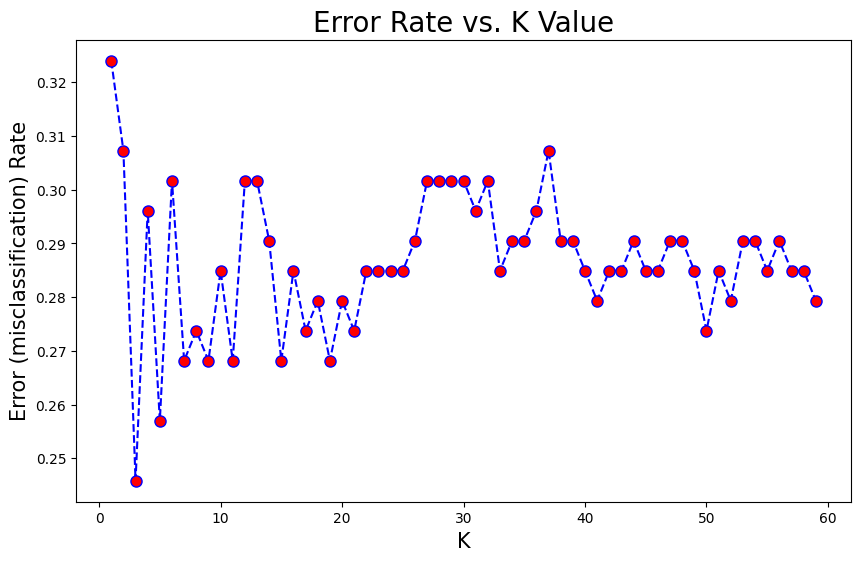

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)